# Mundo 9 - Configurar cores no matplotlib

https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

In [ ]:
cotacoes = yf.download(["WEGE3.SA"])['Adj Close']

In [ ]:
#trocando a cor pelo nome

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = "black")
ax.set_facecolor('c')

# Cores por código

https://www.hexcolortool.com/#42eaf0

In [ ]:
#trocando a cor pelo código da cor

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = "#42eaf0")
ax.set_facecolor('black')

In [ ]:
#trocando a cor pelo número da cor

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = (65/255, 234/255, 240/255))
ax.set_facecolor((10/255, 0/255, 0/255))



# Configurando cores por estilos

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [ ]:
plt.style.available

In [ ]:
plt.style.use("default")
#plt.style.use("ggplot")

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values)

In [4]:
!pip install -q mplcyberpunk

In [8]:
import mplcyberpunk
import matplotlib.ticker as mtick

plt.style.use("cyberpunk")

In [ ]:
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA"])['Adj Close']

retornos = cotacoes.pct_change().dropna()

retornos_acum = (1 + retornos).cumprod() - 1

fig, ax = plt.subplots()

ax.plot(retornos_acum.index, retornos_acum['WEGE3.SA'], label = "WEGE3")
ax.plot(retornos_acum.index, retornos_acum['PETR4.SA'], label = "PETR4")
ax.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

mplcyberpunk.add_glow_effects()

plt.show()

In [ ]:
acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA"]

cotacoes = yf.download(acoes)['Adj Close']

retornos = cotacoes.pct_change().dropna()

retornos_acum = (1 + retornos).cumprod() - 1

fig, ax = plt.subplots()

for acao in acoes:

    ax.plot(retornos_acum.index, retornos_acum[acao], label = acao.replace(".SA", ""))

ax.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(False)


plt.show()

# Exercícios

* Exercício 100: Puxe as cotações de 4 ações a sua escolha, calcule a correlação de 12 meses das ações com o ibovespa e plote um gráfico dessas correlações, escolhendo as cores das linhas a sua escolha.

* Exercício 101: Crie o mesmo gráfico utilizando o estilo Cyberpunk. 

In [2]:
import matplotlib.dates as mdate

[*********************100%%**********************]  5 of 5 completed


/var/folders/49/ds_8p60s0c13tflg2l28s78w0000gp/T/ipykernel_92782/938750428.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = cotacoes.pct_change().dropna()


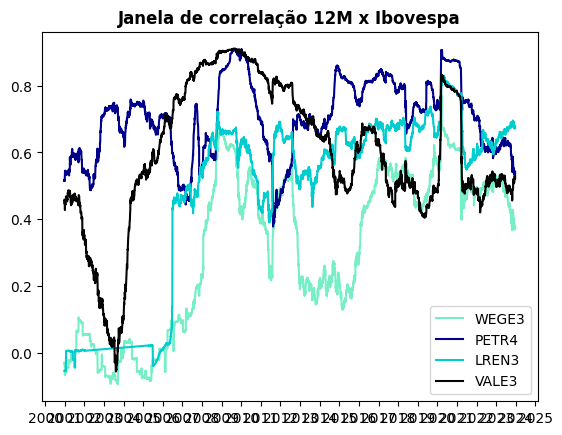

In [9]:
plt.style.use("default")

acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA", "^BVSP"]

cotacoes = yf.download(acoes)['Adj Close']

retornos = cotacoes.pct_change().dropna()

fig, ax = plt.subplots()

acoes.remove("^BVSP")

cores = ['#76EEC6', '#00008B', '#00CDCD', '#050505']

for i, acao in enumerate(acoes):
    
    janela_cor = retornos[acao].rolling(252).corr(retornos["^BVSP"]).dropna()
    ax.plot(janela_cor.index, janela_cor.values, label = acao.replace(".SA", ""), color = cores[i])

ax.xaxis.set_major_locator(mdate.YearLocator(1))
ax.legend()
ax.grid(False)
ax.set_title("Janela de correlação 12M x Ibovespa", fontweight ="bold")


plt.show()

[*********************100%%**********************]  5 of 5 completed


/var/folders/49/ds_8p60s0c13tflg2l28s78w0000gp/T/ipykernel_92782/1432438220.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = cotacoes.pct_change().dropna()


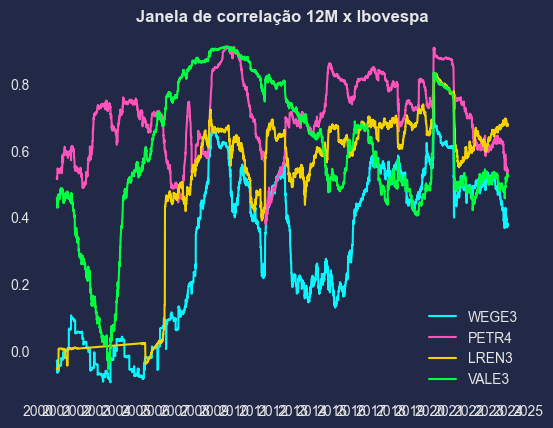

In [10]:
#gabarito 101

plt.style.use("cyberpunk")

acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA", "^BVSP"]

cotacoes = yf.download(acoes)['Adj Close']

retornos = cotacoes.pct_change().dropna()

fig, ax = plt.subplots()

acoes.remove("^BVSP")

for i, acao in enumerate(acoes):
    
    janela_cor = retornos[acao].rolling(252).corr(retornos["^BVSP"]).dropna()
    ax.plot(janela_cor.index, janela_cor.values, label = acao.replace(".SA", ""))

ax.xaxis.set_major_locator(mdate.YearLocator(1))
ax.legend()
ax.grid(False)
ax.set_title("Janela de correlação 12M x Ibovespa", fontweight ="bold")


plt.show()

# Mundo 10

Gráfico de barras